In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import norm, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('precision', 3)
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
raw_data = pd.read_csv("kc_house_data.csv")
df = raw_data.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


# Column description



1.id - Unique ID for each home sold

2.date - Date of the home sale

3.price - Price of each home sold

4.bedrooms - Number of bedrooms

5.bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

6.sqft_living - Square footage of the apartments interior living space

7.sqft_lot - Square footage of the land space

8.floors - Number of floors

9.waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

10.view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,

11.grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

12.sqft_above - The square footage of the interior housing space that is above ground level

13.sqft_basement - The square footage of the interior housing space that is below ground level

14.yr_built - The year the house was initially built

15.yr_renovated - The year of the house’s last renovation

16.zipcode - What zipcode area the house is in

17.lat - Lattitude

18.long - Longitude

19.sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

20.sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



# DATA PREPROCESSING - EDA

# Handling missing values

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580e+09,2.877e+09,1.000e+06,2.123e+09,3.905e+09,7.309e+09,9.900e+09
price,21613.0,5.401e+05,3.671e+05,7.500e+04,3.220e+05,4.500e+05,6.450e+05,7.700e+06
bedrooms,21613.0,3.371e+00,9.301e-01,0.000e+00,3.000e+00,3.000e+00,4.000e+00,3.300e+01
bathrooms,21613.0,2.115e+00,7.702e-01,0.000e+00,1.750e+00,2.250e+00,2.500e+00,8.000e+00
sqft_living,21613.0,2.080e+03,9.184e+02,2.900e+02,1.427e+03,1.910e+03,2.550e+03,1.354e+04
sqft_lot,21613.0,1.511e+04,4.142e+04,5.200e+02,5.040e+03,7.618e+03,1.069e+04,1.651e+06
floors,21613.0,1.494e+00,5.400e-01,1.000e+00,1.000e+00,1.500e+00,2.000e+00,3.500e+00
waterfront,21613.0,7.542e-03,8.652e-02,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000e+00
view,21613.0,2.343e-01,7.663e-01,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.000e+00
condition,21613.0,3.409e+00,6.507e-01,1.000e+00,3.000e+00,3.000e+00,4.000e+00,5.000e+00


In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Drop id and date due to irrelevance with the price



In [9]:
df=df.drop(['id', 'date'],axis=1)

# HEATMAP IN ALL VARIABLES

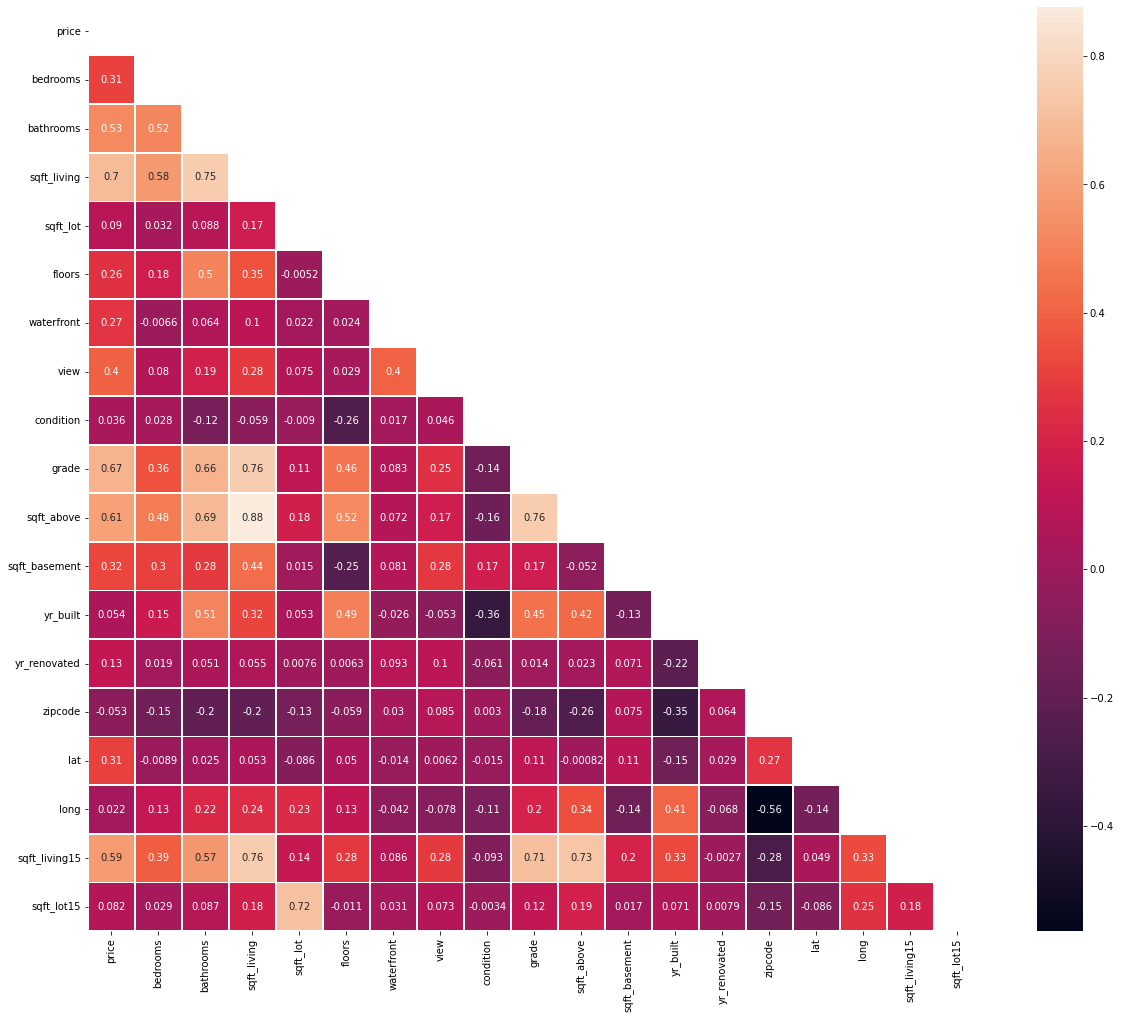

In [10]:
corr_data = df
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

# Insight:Price has high correlation with sqft living,grade,sqft_above,sqft_living15,bathrooms

Drop  id and date due to irrelevance with the price

# Pairplots

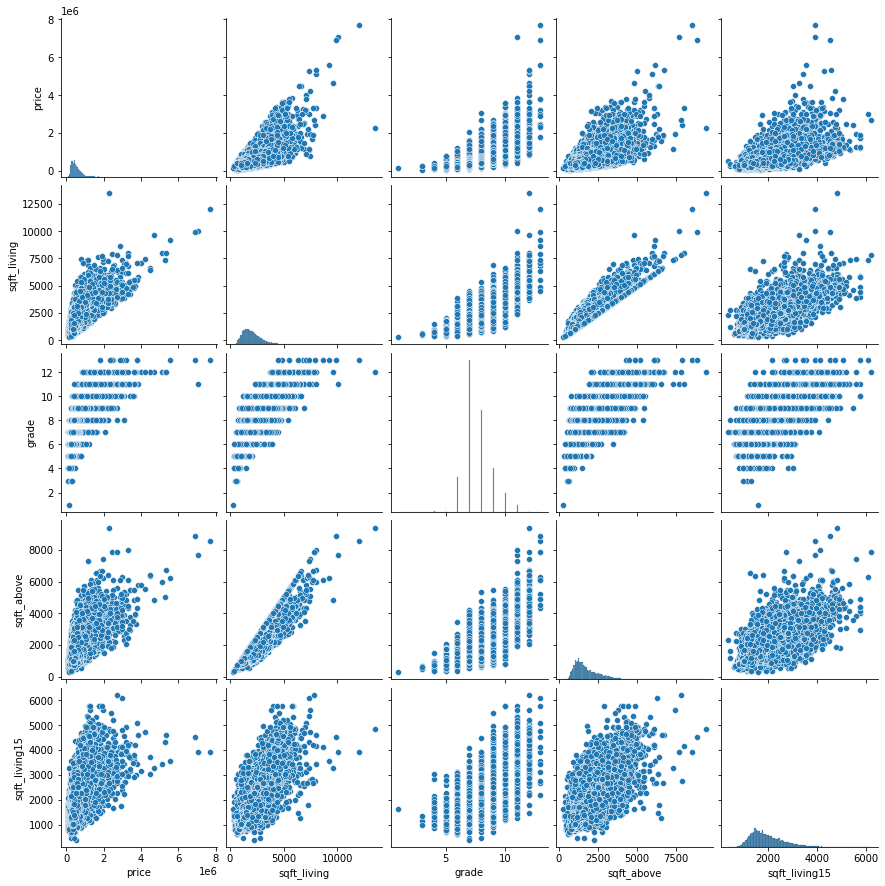

In [11]:
strong_related=['price','sqft_living','grade','sqft_above','sqft_living15']
df1=df[strong_related]
sns.pairplot(df1)
plt.show()

# Find outliers

In [12]:
def find_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers
for col in strong_related:
    outliers = find_outliers(df[col])
    if len(outliers):
        print(f"* {col} has these  outliers,\n{outliers}\n")
        print(f"* {col} has {df[col].count()}   values.\n")
        print(f"* Percentage of outliers is {100*len(outliers)/df[col].count()} %  \n")
    else:
        print(f"* {col} doesn't have any  outliers.\n")

* price has these  outliers,
5        1.225e+06
21       2.000e+06
49       1.350e+06
69       1.325e+06
125      1.450e+06
           ...    
21568    1.700e+06
21576    3.567e+06
21590    1.222e+06
21597    1.575e+06
21600    1.537e+06
Name: price, Length: 1146, dtype: float64

* price has 21613   values.

* Percentage of outliers is 5.302364317771712 %  

* sqft_living has these  outliers,
5        5420
70       4770
115      4380
153      5180
239      4410
         ... 
21551    4350
21561    4500
21576    4850
21590    4910
21600    4470
Name: sqft_living, Length: 572, dtype: int64

* sqft_living has 21613   values.

* Percentage of outliers is 2.64655531393143 %  

* grade has these  outliers,
5        11
36        5
66       10
70       11
75       10
         ..
21576    10
21590    11
21593    10
21597    10
21600    11
Name: grade, Length: 1911, dtype: int64

* grade has 21613   values.

* Percentage of outliers is 8.841900707907278 %  

* sqft_above has these  outliers,
5  

# Bοxplots and distribution to visualize outliers

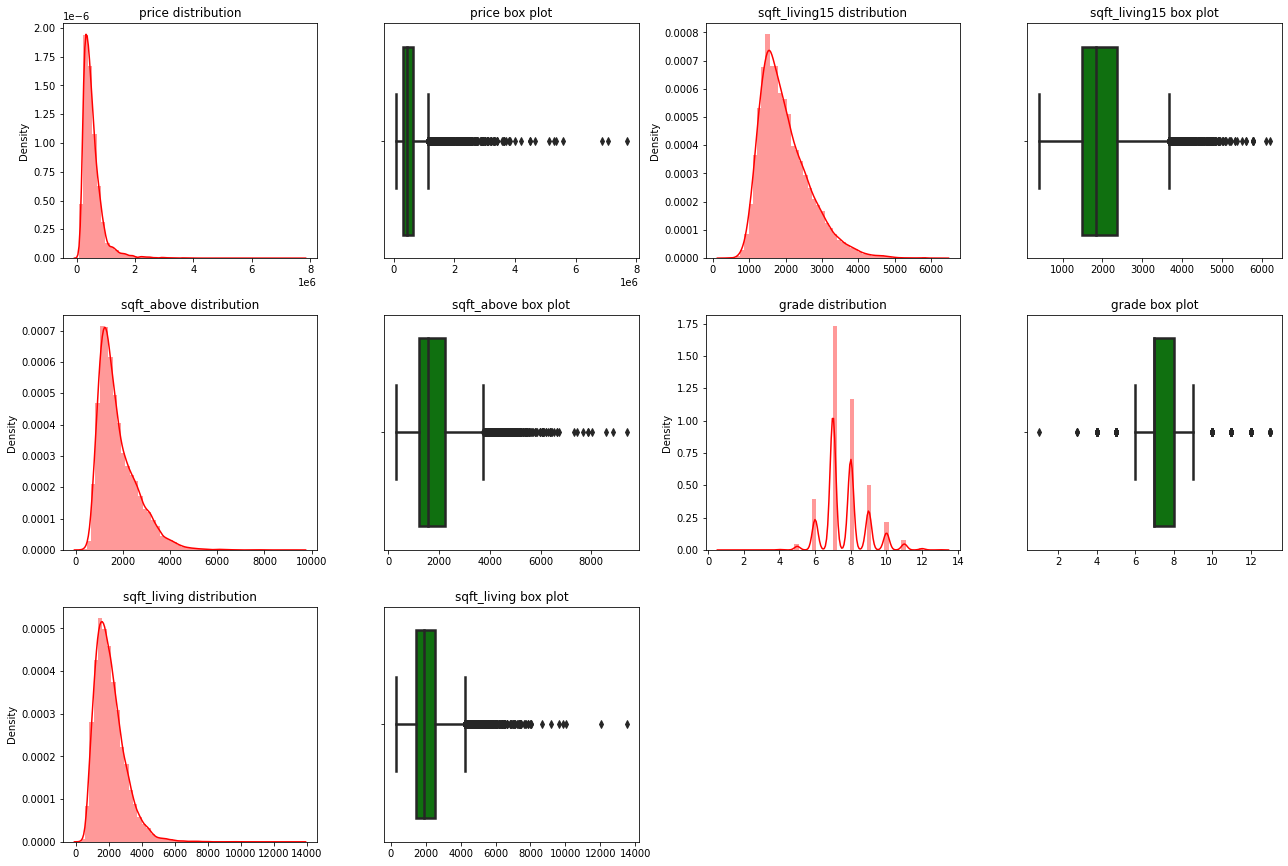

In [13]:

outliers_col=['price','sqft_living15','sqft_above','grade','sqft_living']
rows = len(outliers_col)
cols = 4
i=0
fig = plt.figure(2, (18, rows*4))
for col in outliers_col:
    ###DISTRIBUTION PLOTS###
    i += 1
    ax1 = plt.subplot(rows, cols,i)

    sns.distplot(df[col],color='r')
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()
    ###BOX PLOTS###

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.boxplot(df[col],color='g', orient='h', linewidth=2.5)
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} box plot')
    plt.tight_layout()

# So we do not remove outliers due to the time consuming and the high precentage of them so as to not lose information




# Plots

Text(0.5, 1.0, 'Prices by  year of renovation')

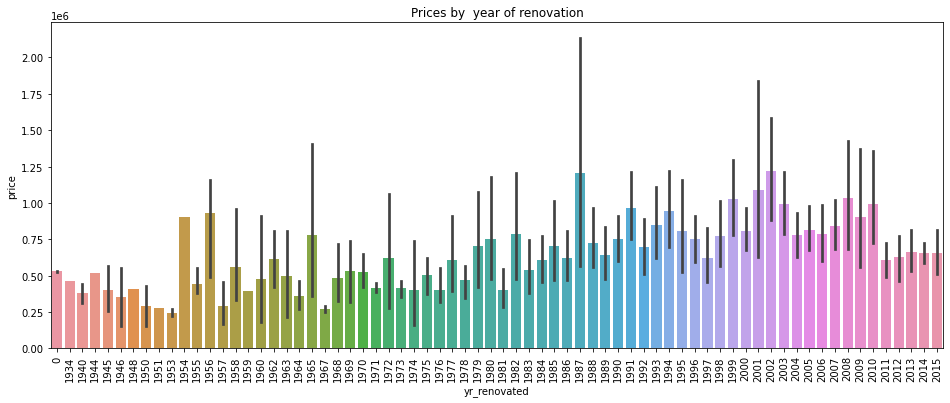

In [14]:
plt.figure(figsize = (16,6))

sns.barplot(x='yr_renovated', y='price',  data=df)
plt.xticks(rotation='vertical')
plt.title('Prices by  year of renovation')



Text(0.5, 1.0, 'Prices by  year of built')

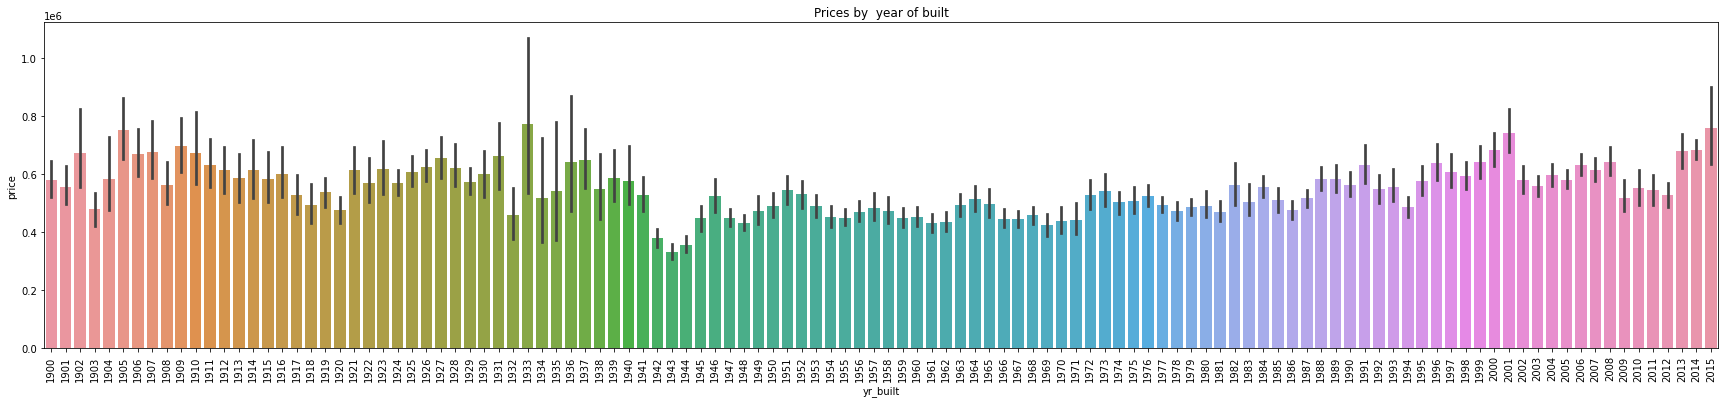

In [15]:
plt.figure(figsize = (30,6))
sns.barplot(x='yr_built', y='price',  data=df)
plt.xticks(rotation='vertical')
plt.title('Prices by  year of built')

# Insight#2:It is obvious that the years of either built or renovation by themselves do not affect price

Text(0.5, 1.0, 'price ~ grade')

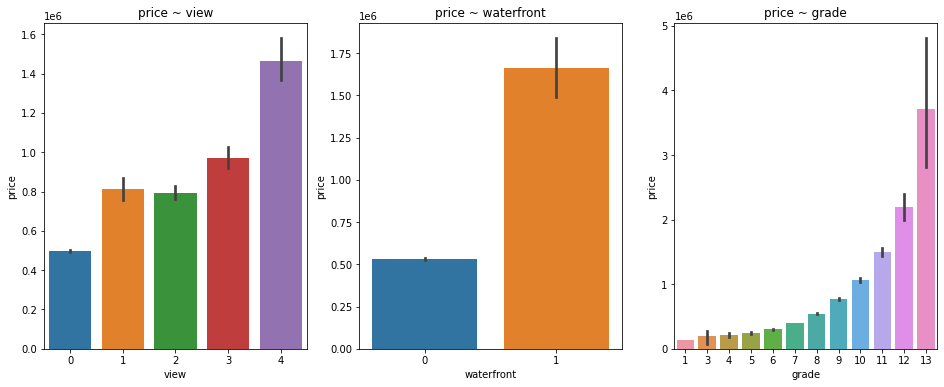

In [16]:
plt.figure(figsize = (16,6))

ax = plt.subplot(131)
ax = sns.barplot(x = 'view', y = 'price', data = df)

ax.set_title('price ~ view')

ax = plt.subplot(132)
ax = sns.barplot(x = 'waterfront', y = 'price', data = df, ax = ax)
ax.set_title('price ~ waterfront')


ax = plt.subplot(133)
ax = sns.barplot(x = 'grade', y = 'price', data = df, ax = ax)
ax.set_title('price ~ grade')


# Insight#3:On contrast with heatmap we see that price is strongly related with view,waterfront and grade

# Piecharts

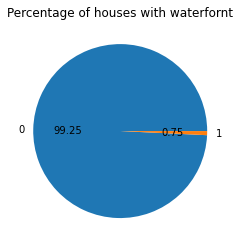

In [17]:
plt.title('Percentage of houses with waterfornt')
plt.pie(  df['waterfront'].value_counts(),
    labels = df['waterfront'].unique(), autopct="%.2f")
plt.show()



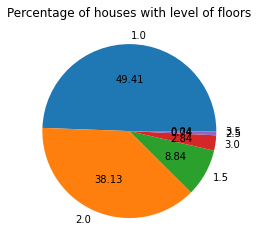

In [18]:
plt.title('Percentage of houses with level of floors')
plt.pie(  df['floors'].value_counts(),
    labels = df['floors'].unique(), autopct="%.2f")
plt.show()

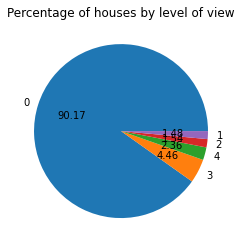

In [19]:
plt.title('Percentage of houses by level of view')
plt.pie(  df['view'].value_counts(),
    labels = df['view'].unique(), autopct="%.2f")
plt.show()

# Insight#4:As it can be seen the houses with excellent view,waterfront and many floors are very few and this a main reason that affects prices

# **Feature Ranking**

Whichever feature selection will be created is essential that view,waterfront and grade must be included.In this section will be explored the best group of features testing many regression algorithms

In [20]:

y=df['price'].values
X1 = df.drop(['price'], axis=1)
X=X1.values
colnames = X1.columns

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [22]:
ranks = {}
def ranking(coefficients, columnNames, order=1):
    """
    This function will take coefficients of different models and will scale them and return a dictionary.
    """
    minmax = MinMaxScaler()
    if np.array(coefficients).ndim == 1:
        coefficients = np.array(coefficients).reshape(1, -1)
    coefficients = minmax.fit_transform(order*np.array(coefficients).T).T[0]
    coefficients = map(lambda x: round(x, 2), coefficients)
    return dict(zip(columnNames, coefficients))

In [23]:
ranks = {}
def featureRanker(X, y, ranking, colnames):
    """
    This function will return the ranks dictionary with coefficients of different models. 
    This function will take independent variables and dependent variable as an input. 
    Along with that a ranking function which will generate ranks.
    """
    params = {}
    models = {
        LinearRegression(normalize= True):  'lr',
        Ridge(alpha= 7):  'Ridge',
        Lasso(alpha= .05):  'Lasso',
        ElasticNet(alpha= 0.0005, l1_ratio= .9, random_state= 0):  'Elastic',
        RandomForestRegressor(n_jobs= -1,
                               n_estimators= 100, random_state= 0):  'RF',
        GradientBoostingRegressor(n_estimators= 100, random_state= 0):  'GBR',
        XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                      colsample_bytree=1, max_depth=70, random_state = 0):  'XGBR',
        LGBMRegressor(n_jobs= -1,
                       n_estimators= 100, random_state= 0):  'LGBM',
    }
    for i, model in enumerate(tqdm_notebook(models, desc = 'Training models')):
        estimator = model
        estimator.fit(X, y)
        if models[model] == 'lr':
            rfe = RFE(estimator, n_features_to_select=1)
            rfe.fit(X, y)
            ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
        if not hasattr(estimator, 'coef_'):
            if not hasattr(estimator, 'dual_coef_'):
                ranks[models[model]] = ranking(
                    estimator.feature_importances_, colnames)
            elif hasattr(estimator, 'dual_coef_'):
                ranks[models[model]] = ranking(
                    np.abs(svr.dual_coef_), colnames)
        elif hasattr(estimator, 'coef_'):
            ranks[models[model]] = ranking(
                np.abs(estimator.coef_), colnames)
    return ranks

In [24]:
ranks = featureRanker(X, y, ranking, colnames)

Training models:   0%|          | 0/8 [00:00<?, ?it/s]

[07:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name]
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str,
                                          [ranks[method][name] for method in methods]))))

	Elastic	GBR	LGBM	Lasso	RF	RFE	Ridge	XGBR	lr	Mean
bedrooms	0.06	0.0	0.01	0.06	0.0	0.59	0.06	0.0	0.06	0.09
bathrooms	0.07	0.02	0.1	0.07	0.02	0.71	0.07	0.0	0.07	0.13
sqft_living	0.0	0.98	0.52	0.0	0.76	0.35	0.0	0.05	0.0	0.3
sqft_lot	0.0	0.01	0.4	0.0	0.04	0.0	0.0	0.0	0.0	0.05
floors	0.01	0.0	0.0	0.01	0.0	0.47	0.01	0.0	0.01	0.06
waterfront	0.96	0.13	0.06	0.97	0.08	1.0	0.94	1.0	0.97	0.68
view	0.09	0.07	0.14	0.09	0.03	0.76	0.09	0.07	0.09	0.16
condition	0.04	0.01	0.08	0.04	0.0	0.65	0.04	0.0	0.04	0.1
grade	0.16	1.0	0.21	0.16	1.0	0.88	0.16	0.5	0.16	0.47
sqft_above	0.0	0.05	0.47	0.0	0.05	0.29	0.0	0.01	0.0	0.1
sqft_basement	0.0	0.0	0.27	0.0	0.01	0.24	0.0	0.0	0.0	0.06
yr_built	0.0	0.1	0.38	0.0	0.07	0.53	0.0	0.01	0.0	0.12
yr_renovated	0.0	0.0	0.05	0.0	0.0	0.12	0.0	0.01	0.0	0.02
zipcode	0.0	0.04	0.32	0.0	0.04	0.41	0.0	0.01	0.0	0.09
lat	1.0	0.51	1.0	1.0	0.47	0.94	1.0	0.05	1.0	0.77
long	0.36	0.21	0.76	0.36	0.2	0.82	0.35	0.03	0.36	0.38
sqft_living15	0.0	0.07	0.36	0.0	0.09	0.18	0.0	0.01	0.0	0.08
sqft_lot

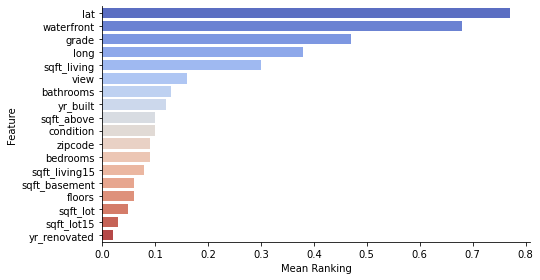

In [26]:
'''Put the mean scores into a Pandas dataframe'''

meanplot = pd.DataFrame(list(r.items()), columns=['Feature', 'Mean Ranking'])

'''Sorting the dataframe'''
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
sns.factorplot(x="Mean Ranking", y="Feature", data=meanplot,
               kind="bar", size=4, aspect=1.9, palette='coolwarm');

# Insight#5:It can be assumed that lat,waterfront and grade are top 3 features but the existence of multilinearity leading in overfitting can not clear conclusion of how many features should be taken. 

# **Machine Learning models testing**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing



Train-test process

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = preprocessing.scale(X_train), preprocessing.scale(X_test)
y_train_scaled, y_test_scaled = preprocessing.scale(y_train), preprocessing.scale(y_test)

**Lasso with Grid Search**

In [32]:

lasso = Lasso(alpha=0.1, max_iter=1000)
param = {'alpha':[0, 0.1, 0.01, 0.001, 1]}
lasso_search = GridSearchCV(lasso, param, cv=5, n_jobs=-1)

lasso_search.fit(X_train_scaled, y_train_scaled)

lasso_pred = lasso_search.predict(X_test_scaled)
print(f'Best parameter found: {lasso_search.best_params_}')

print(f'Train score: {lasso_search.score(X_train_scaled, y_train_scaled)}')
train_score_lasso=lasso_search.score(X_train_scaled, y_train_scaled)

print(f'Test score: {lasso_search.score(X_test_scaled, y_test_scaled)}')
test_score_lasso=lasso_search.score(X_test_scaled, y_test_scaled)

print(f'Overall model accuracy: {r2_score(y_test_scaled, lasso_pred)}')

print(f'Mean Squared Error: {mean_squared_error(y_test_scaled, lasso_pred)}')
mse_lasso=mean_squared_error(y_test_scaled, lasso_pred)

Best parameter found: {'alpha': 0.001}
Train score: 0.6990769962587357
Test score: 0.7012205631965138
Overall model accuracy: 0.7012205631965138
Mean Squared Error: 0.2987794368034862


**Linear Regression**

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
linear_pred = model.predict(X_test_scaled)
print(f'Train score: {model.score(X_train_scaled, y_train_scaled)}')
train_score_linear=model.score(X_train_scaled, y_train_scaled)

print(f'Test score: {model.score(X_test_scaled, y_test_scaled)}')
test_score_linear=model.score(X_test_scaled, y_test_scaled)

print(f'Overall model accuracy: {r2_score(y_test_scaled, linear_pred)}')

print(f'Mean Squared Error: {mean_squared_error(y_test_scaled, linear_pred)}')
mse_linear=mean_squared_error(y_test_scaled, linear_pred)

Train score: 0.6991021854487474
Test score: 0.7013304122809005
Overall model accuracy: 0.7013304122809005
Mean Squared Error: 0.29866958771909946


**Ridge with GridSearch**

In [34]:
ridge_model = Ridge()

param = {'alpha':[0, 0.1, 0.01, 0.001, 1]}

ridge_search = GridSearchCV(ridge_model, param, cv=5, n_jobs=-1)

ridge_search.fit(X_train_scaled, y_train_scaled)
ridge_pred = ridge_search.predict(X_test_scaled)

print(f'Best parameter found: {ridge_search.best_params_}')
print(f'Train score: {ridge_search.score(X_train_scaled, y_train_scaled)}')
train_score_ridge=ridge_search.score(X_train_scaled, y_train_scaled)

print(f'Test score: {ridge_search.score(X_test_scaled, y_test_scaled)}')
test_score_ridge=ridge_search.score(X_test_scaled, y_test_scaled)

print(f'Overall model accuracy: {r2_score(y_test_scaled, ridge_pred)}')

print(f'Mean Squared Error: {mean_squared_error(y_test_scaled, ridge_pred)}')
mse_ridge=mean_squared_error(y_test_scaled, ridge_pred)

Best parameter found: {'alpha': 1}
Train score: 0.6991021837940057
Test score: 0.7013304767930879
Overall model accuracy: 0.7013304767930879
Mean Squared Error: 0.29866952320691204


**Decision Tree Regressor with Grid Search**

In [35]:
dtree = DecisionTreeRegressor()

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}

tree_search = GridSearchCV(dtree, params, cv=5, n_jobs=-1)

tree_search.fit(X_train_scaled, y_train_scaled)

tree_pred = tree_search.predict(X_test_scaled)

print(f'Best parameter found: {tree_search.best_params_}')
print(f'Train score: {tree_search.score(X_train_scaled, y_train_scaled)}')
train_score_tree=tree_search.score(X_train_scaled, y_train_scaled)
print(f'Test score: {tree_search.score(X_test_scaled, y_test_scaled)}')
test_score_tree=tree_search.score(X_test_scaled, y_test_scaled)
print(f'Overall model accuracy: {r2_score(y_test_scaled, tree_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test_scaled, tree_pred)}')
mse_tree=mean_squared_error(y_test_scaled, tree_pred)

Best parameter found: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 3}
Train score: 0.8216807092456143
Test score: 0.7153386900493673
Overall model accuracy: 0.7153386900493673
Mean Squared Error: 0.28466130995063266


**XGB Regressor with Grid Search**

In [36]:
params = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_xgb=XGBRegressor()

model_xgb_search = GridSearchCV(model_xgb, params, cv=5, n_jobs=-1)

model_xgb_search.fit(X_train_scaled, y_train_scaled)

model_xgb_pred = model_xgb_search.predict(X_test_scaled)

print(f'Best parameter found: {model_xgb_search.best_params_}')
print(f'Train score: {model_xgb_search.score(X_train_scaled, y_train_scaled)}')
train_score_xgb=model_xgb_search.score(X_train_scaled, y_train_scaled)
print(f'Test score: {model_xgb_search.score(X_test_scaled, y_test_scaled)}')
test_score_xgb=model_xgb_search.score(X_test_scaled, y_test_scaled)
print(f'Overall model accuracy: {r2_score(y_test_scaled, model_xgb_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test_scaled, model_xgb_pred)}')
mse_xgb=mean_squared_error(y_test_scaled, model_xgb_pred)

Best parameter found: {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Train score: 0.9757260004411233
Test score: 0.8720542954027795
Overall model accuracy: 0.8720542954027795
Mean Squared Error: 0.1279457045972205


**Visualization of Model train,test,mse scores**

In [37]:
train_score=[train_score_lasso,train_score_ridge,train_score_linear,train_score_tree,train_score_xgb]
test_score=[test_score_lasso,test_score_ridge,test_score_linear,test_score_tree,test_score_xgb]
Overfit=[train_score_lasso-test_score_lasso,train_score_ridge-test_score_ridge,train_score_linear-test_score_linear,train_score_tree-test_score_tree,train_score_xgb-test_score_xgb]
MSE=[mse_lasso,mse_ridge,mse_linear,mse_tree,mse_xgb]
col={'Train Score':train_score,'Test Score':test_score,'Overfit':Overfit,'MSE':MSE}
models=['Lasso','Ridge','Linear Regression','Decision Tree','XGB Regressor']
df=pd.DataFrame(data=col,index=models)
df

,Train Score,Test Score,Overfit,MSE
Lasso,0.699,0.701,-0.002,0.299
Ridge,0.699,0.701,-0.002,0.299
Linear Regression,0.699,0.701,-0.002,0.299
Decision Tree,0.822,0.715,0.106,0.285
XGB Regressor,0.976,0.872,0.104,0.128


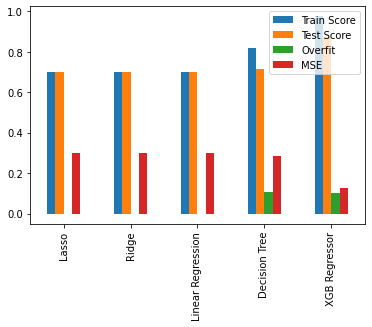

In [38]:
df.plot(kind='bar')

# Conclusions

**Conclusion#1**:Lasso,Ridge,linear regression have not so high test scores but they have zero overfitting 

**Conclusion#2:**Decision Tree and especially XGB have high test scores but they also have high overfitting,which means that the model has learned specifically on the train set

**Conclusion#3**:From the EDA we suggest that real estates should consider when they buy a house mostly its grade,its location and if it has waterfornt.Moreover,to  increase their profit they could buy cheap houses with low grade upgrade them and then sell them in a higher price or invest in houses that have waterfornt.So we chose model with 70% accuracy in price prediction but without losing any information proposing the above.